In [1]:
%matplotlib inline
import pandas as pd
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('./customer_data_sample_2.csv')
customers_df.sort_values(by=['age'])
customers_df.info()
#See that there are 714/891 ages on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
customer_id          891 non-null int64
converted            891 non-null int64
customer_segment     891 non-null int64
gender               891 non-null object
age                  714 non-null float64
related_customers    891 non-null int64
family_size          891 non-null int64
initial_fee_level    891 non-null float64
credit_account_id    891 non-null object
branch               889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [3]:
def fill_with_median(feature, replace_zeros=False):
    # Fill NaN with median
    median = customers_df[feature].median()
    customers_df[feature].fillna(median, inplace=True)
    if replace_zeros:
        # Fill 0 with median
        customers_df[feature].mask(customers_df[feature]==0, customers_df[feature].median(), inplace=True)

fill_with_median("age", replace_zeros=True)
#Filling empty ages with medians
customers_df.head(10)

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
5,15006,0,13,male,28.0,0,0,16.9166,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Turku
6,15007,0,11,male,54.0,0,0,103.7250,68781db29be014199a40a50d93c5f1595dde7ca164c5b0...,Helsinki
7,15008,0,13,male,2.0,3,1,42.1500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
8,15009,1,13,female,27.0,0,2,22.2666,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
9,15010,1,12,female,14.0,1,0,60.1416,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Tampere


In [4]:
def distplot(feature):
    plt.subplots(figsize=(20,5))
    data = customers_df[feature].copy()
    data = data.dropna()
    if isinstance(data.iloc[0], str):
        print('Only use distplot for numerical data!')
        return
    ax = sns.distplot(data)
    plt.show

In [5]:
def converted_by(feature):
    plt.subplots(figsize=(20,5))
    sns.countplot(feature, hue='converted',data=customers_df)
    plt.show()

In [6]:
def barplot(feature):
    plt.subplots(figsize=(20,5))
    x = customers_df[feature].unique()
    try:
        x.sort()
    except TypeError:
        pass
    x.tolist()
    y = [customers_df[customers_df[feature]==value][feature].count() for value in x]
    ax = sns.barplot(x=x, y=y)
    plt.show

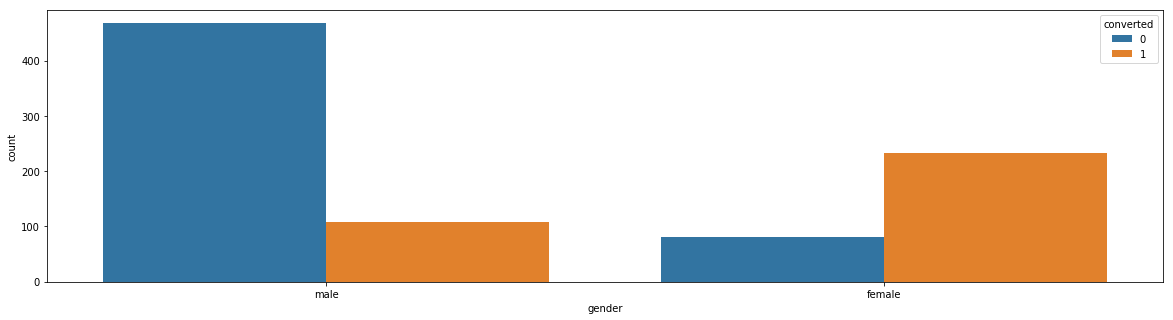

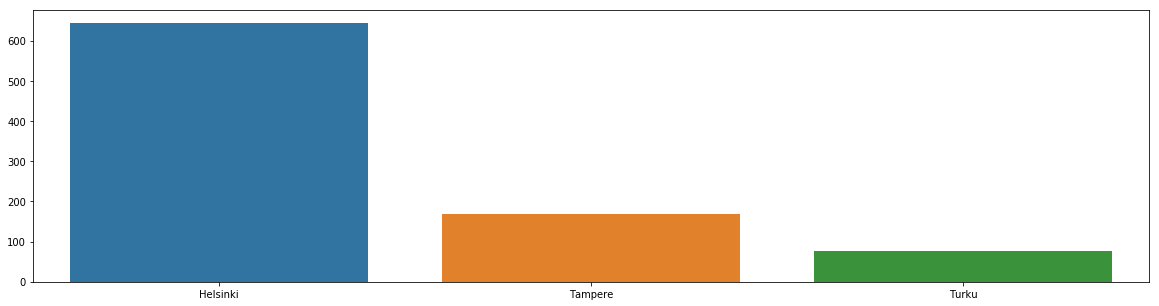

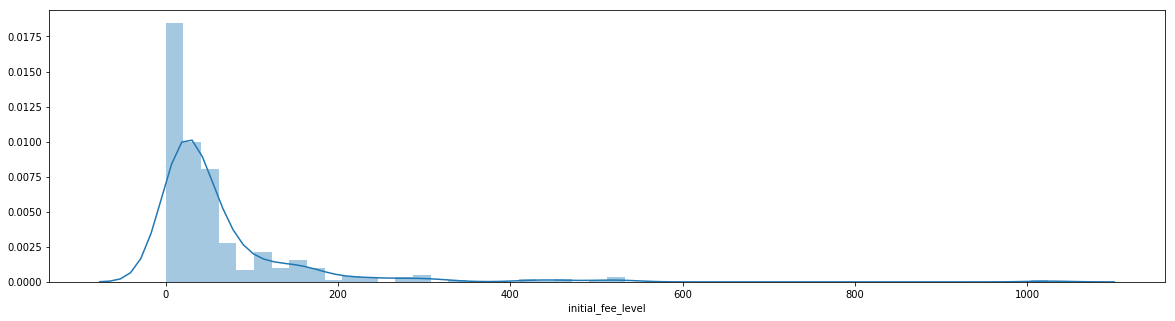

In [7]:
#Options to see different charts

converted_by("gender")
barplot("branch")
distplot("initial_fee_level")

In [20]:
customers_df = pd.get_dummies(customers_df, columns=['branch'])
#converting branches and genders to numbers 
dict_sex = {'male': 0, 'female':1}
customers_df['gender'] = customers_df['gender'].map(dict_sex)

In [21]:
X = customers_df[['customer_segment','gender','age','related_customers','family_size','initial_fee_level','branch_Helsinki','branch_Tampere','branch_Turku']]
#I removed the client_id and account_id because they are just random digits
y = customers_df['converted']
X

,customer_segment,gender,age,related_customers,family_size,initial_fee_level,branch_Helsinki,branch_Tampere,branch_Turku
0,13,0,22.0,1,0,14.5000,1,0,0
1,11,1,38.0,1,0,142.5666,0,1,0
2,13,1,26.0,0,0,15.8500,1,0,0
3,11,1,35.0,1,0,106.2000,1,0,0
4,13,0,35.0,0,0,16.1000,1,0,0
5,13,0,28.0,0,0,16.9166,0,0,1
6,11,0,54.0,0,0,103.7250,1,0,0
7,13,0,2.0,3,1,42.1500,1,0,0
8,13,1,27.0,0,2,22.2666,1,0,0
9,12,1,14.0,1,0,60.1416,0,1,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 9)
(668,)
(223, 9)
(223,)


In [23]:
decision_tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=1)
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [24]:
decision_tree_clf.score(X_test, y_test)

0.7757847533632287

In [25]:
neural_network_clf = MLPClassifier((32,2), learning_rate_init=0.001, solver='adam', batch_size=32, random_state=1)
neural_network_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
neural_network_clf.score(X_test, y_test)

0.7802690582959642

In [ ]:
#Tried to do small predicting algorithms. Success rate 78% compared to real results.